In [67]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [68]:
df = pd.read_excel("F:\Gitworkplace\Excel_Project\Road Accident Data.xlsx")

In [69]:
df.head()

,Accident_Index,Accident Date,Month,Year,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,2021-01-01,Jan,2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,...,1,2,Metropolitan Police,Dry,One way street,30,15:11:00,Urban,Fine no high winds,Car
1,200901BS70002,2021-01-05,Jan,2021,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59:00,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,2021-01-04,Jan,2021,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19:00,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,2021-01-05,Jan,2021,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,08:10:00,Urban,Other,Motorcycle over 500cc
4,200901BS70005,2021-01-06,Jan,2021,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25:00,Urban,Fine no high winds,Car


In [70]:
df.shape

(307973, 23)

In [71]:
df.drop("Accident_Index", axis=1, inplace=True)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Accident Date               307973 non-null  datetime64[ns]
 1   Month                       307973 non-null  object        
 2   Year                        307973 non-null  int64         
 3   Day_of_Week                 307973 non-null  object        
 4   Junction_Control            307973 non-null  object        
 5   Junction_Detail             307973 non-null  object        
 6   Accident_Severity           307973 non-null  object        
 7   Latitude                    307973 non-null  float64       
 8   Light_Conditions            307973 non-null  object        
 9   Local_Authority_(District)  307973 non-null  object        
 10  Carriageway_Hazards         5424 non-null    object        
 11  Longitude                   307973 non-

# About Dataset Columns:

Understand the context of each column and its relevance:

Accident_Index: Unique identifier for each accident.
    
Accident Date: Date of the accident.

Month: Month of the accident.

Year: Year of the accident.

Day_of_Week: Day of the week when the accident occurred.

Junction_Control & Junction_Detail: Information about the junction control and details where the accident occurred.

Accident_Severity: Severity level of the accident (e.g., minor, major, fatal).

Latitude & Longitude: Geographical coordinates of the accident.

Light_Conditions: Lighting conditions at the time of the accident (e.g., daylight, darkness).

Local_Authority_(District): Local authority or district where the accident occurred.

Carriageway_Hazards: Hazards present on the road (if any).

Number_of_Casualties: Number of casualties in the accident.

Number_of_Vehicles: Number of vehicles involved in the accident.

Police_Force: Police force responsible for the area.

Road_Surface_Conditions: Condition of the road surface (e.g., dry, wet).

Road_Type: Type of road (e.g., single carriageway, dual carriageway).

Speed_limit: Speed limit of the road.

Time: Time of the accident.

Urban_or_Rural_Area: Whether the area is urban or rural.

Weather_Conditions: Weather conditions at the time of the accident.

Vehicle_Type: Type of vehicle(s) involved in the accident.

# Handling Missing Values:

In [73]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

Accident Date                      0
Month                              0
Year                               0
Day_of_Week                        0
Junction_Control                   0
Junction_Detail                    0
Accident_Severity                  0
Latitude                           0
Light_Conditions                   0
Local_Authority_(District)         0
Carriageway_Hazards           302549
Longitude                          0
Number_of_Casualties               0
Number_of_Vehicles                 0
Police_Force                       0
Road_Surface_Conditions          317
Road_Type                       1534
Speed_limit                        0
Time                              17
Urban_or_Rural_Area                0
Weather_Conditions              6057
Vehicle_Type                       0
dtype: int64

In [74]:

# Handling missing values
df['Carriageway_Hazards'].fillna('None', inplace=True)
df.dropna(subset=['Weather_Conditions', 'Road_Surface_Conditions', 'Road_Type'], inplace=True)

# Optional: Forward fill or backward fill other missing values
df.fillna(method='ffill', inplace=True)

In [75]:
df.isnull().sum()

Accident Date                 0
Month                         0
Year                          0
Day_of_Week                   0
Junction_Control              0
Junction_Detail               0
Accident_Severity             0
Latitude                      0
Light_Conditions              0
Local_Authority_(District)    0
Carriageway_Hazards           0
Longitude                     0
Number_of_Casualties          0
Number_of_Vehicles            0
Police_Force                  0
Road_Surface_Conditions       0
Road_Type                     0
Speed_limit                   0
Time                          0
Urban_or_Rural_Area           0
Weather_Conditions            0
Vehicle_Type                  0
dtype: int64

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300512 entries, 0 to 307972
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Accident Date               300512 non-null  datetime64[ns]
 1   Month                       300512 non-null  object        
 2   Year                        300512 non-null  int64         
 3   Day_of_Week                 300512 non-null  object        
 4   Junction_Control            300512 non-null  object        
 5   Junction_Detail             300512 non-null  object        
 6   Accident_Severity           300512 non-null  object        
 7   Latitude                    300512 non-null  float64       
 8   Light_Conditions            300512 non-null  object        
 9   Local_Authority_(District)  300512 non-null  object        
 10  Carriageway_Hazards         300512 non-null  object        
 11  Longitude                   300512 non-null 

In [77]:
df.duplicated().sum()

2

In [78]:
df.drop_duplicates(inplace=True)

In [79]:
df.duplicated().sum()

0

# Exploratory Data Analysis (EDA)

In [80]:
df.describe()

,Accident Date,Year,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles,Speed_limit
count,300510,300510.000000,300510.000000,300510.000000,300510.000000,300510.000000,300510.000000
mean,2021-12-24 08:20:35.723270400,2021.469868,52.485571,-1.361947,1.359446,1.830518,38.932814
min,2021-01-01 00:00:00,2021.000000,49.914488,-7.516225,1.000000,1.000000,10.000000
25%,2021-06-29 00:00:00,2021.000000,51.484875,-2.241664,1.000000,1.000000,30.000000
50%,2021-12-09 00:00:00,2021.000000,52.212485,-1.341214,1.000000,2.000000,30.000000
75%,2022-06-25 00:00:00,2022.000000,53.415999,-0.203738,1.000000,2.000000,50.000000
max,2022-12-31 00:00:00,2022.000000,60.598055,1.759398,48.000000,32.000000,70.000000
std,NaN,0.499092,1.341737,1.354021,0.818270,0.711757,14.062604


# Accident Frequency:

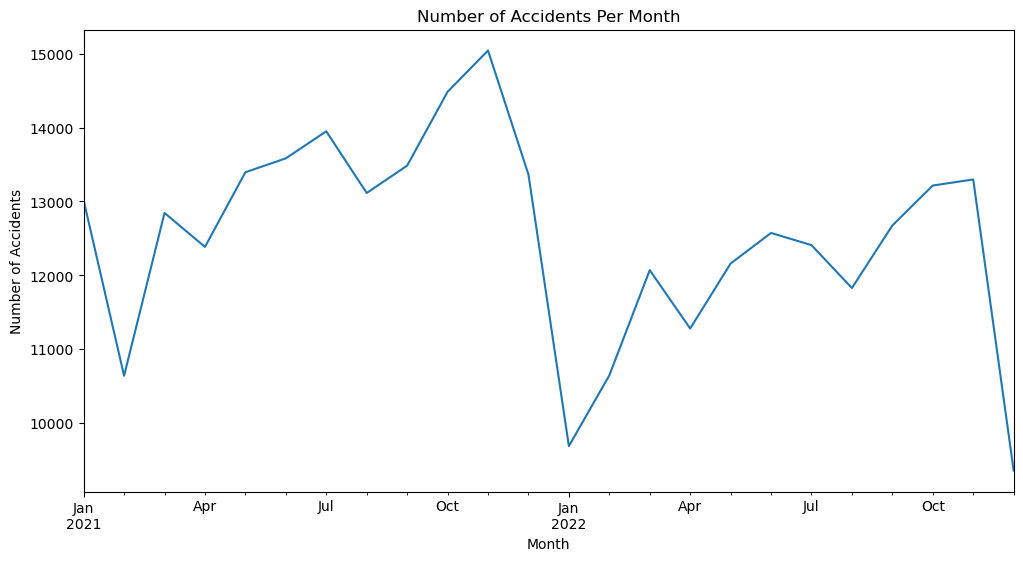

In [81]:
df['Year-Month'] = df['Accident Date'].dt.to_period('M')
accidents_per_month = df.groupby('Year-Month').size()

plt.figure(figsize=(12, 6))
accidents_per_month.plot(kind='line')
plt.title('Number of Accidents Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()

# Accident Severity:

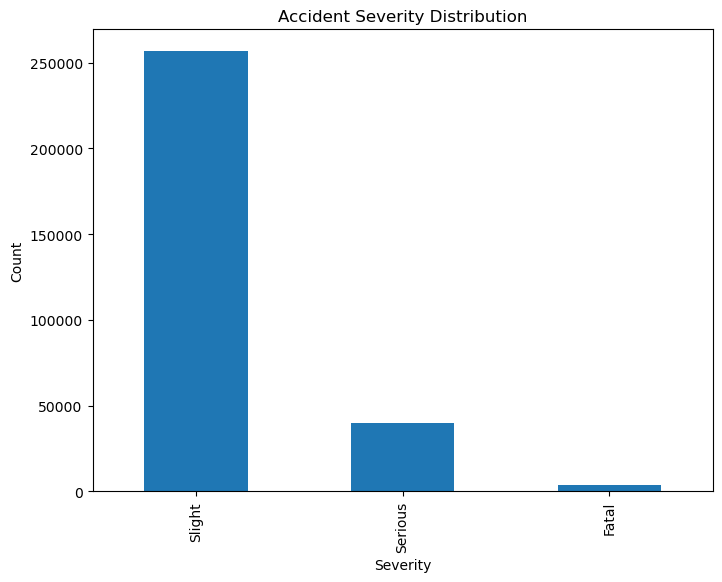

In [82]:
severity_counts = df['Accident_Severity'].value_counts()

plt.figure(figsize=(8, 6))
severity_counts.plot(kind='bar')
plt.title('Accident Severity Distribution')
plt.xlabel('Severity')
plt.ylabel('Count')
plt.show()

# Impact of Weather Conditions:

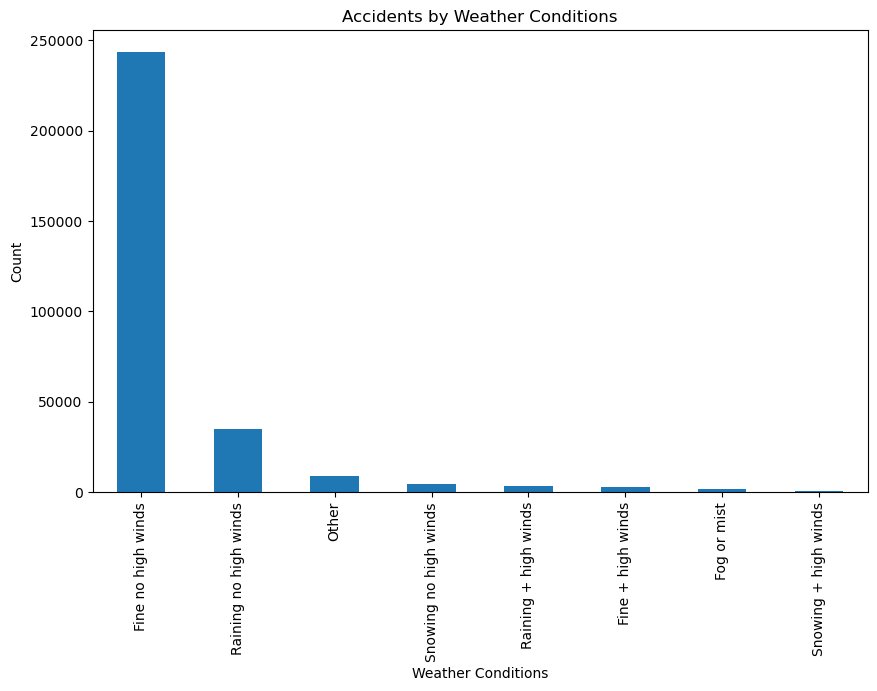

In [83]:
weather_counts = df['Weather_Conditions'].value_counts()

plt.figure(figsize=(10, 6))
weather_counts.plot(kind='bar')
plt.title('Accidents by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Count')
plt.show()

# Time of Day Analysis:

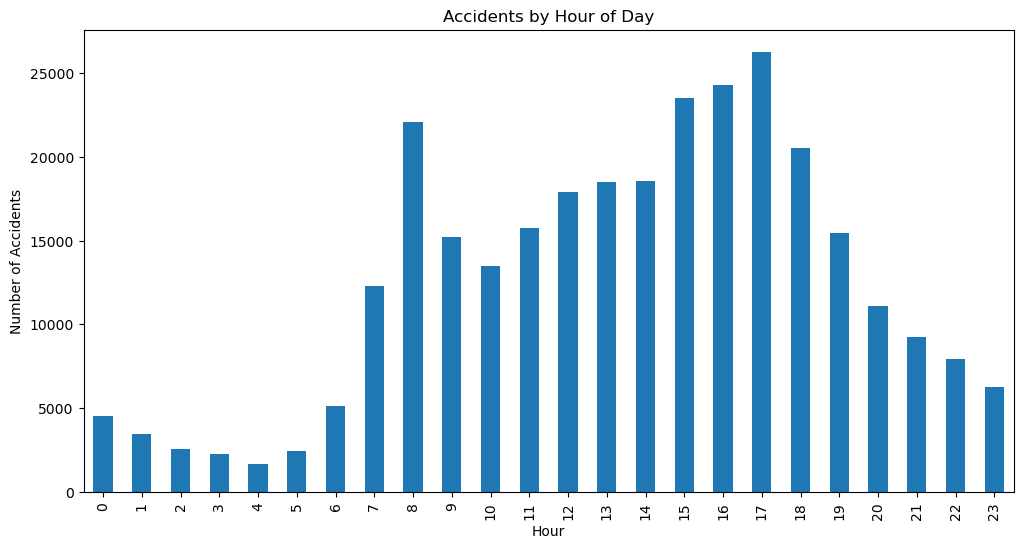

In [84]:
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour
accidents_by_hour = df.groupby('Hour').size()

plt.figure(figsize=(12, 6))
accidents_by_hour.plot(kind='bar')
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.show()

In [85]:
df.head()

,Accident Date,Month,Year,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),...,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year-Month,Hour
0,2021-01-01,Jan,2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,...,Metropolitan Police,Dry,One way street,30,15:11:00,Urban,Fine no high winds,Car,2021-01,15
1,2021-01-05,Jan,2021,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,...,Metropolitan Police,Wet or damp,Single carriageway,30,10:59:00,Urban,Fine no high winds,Taxi/Private hire car,2021-01,10
2,2021-01-04,Jan,2021,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,...,Metropolitan Police,Dry,Single carriageway,30,14:19:00,Urban,Fine no high winds,Taxi/Private hire car,2021-01,14
3,2021-01-05,Jan,2021,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,...,Metropolitan Police,Frost or ice,Single carriageway,30,08:10:00,Urban,Other,Motorcycle over 500cc,2021-01,8
4,2021-01-06,Jan,2021,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,...,Metropolitan Police,Dry,Single carriageway,30,17:25:00,Urban,Fine no high winds,Car,2021-01,17


# Weekdays Analysis

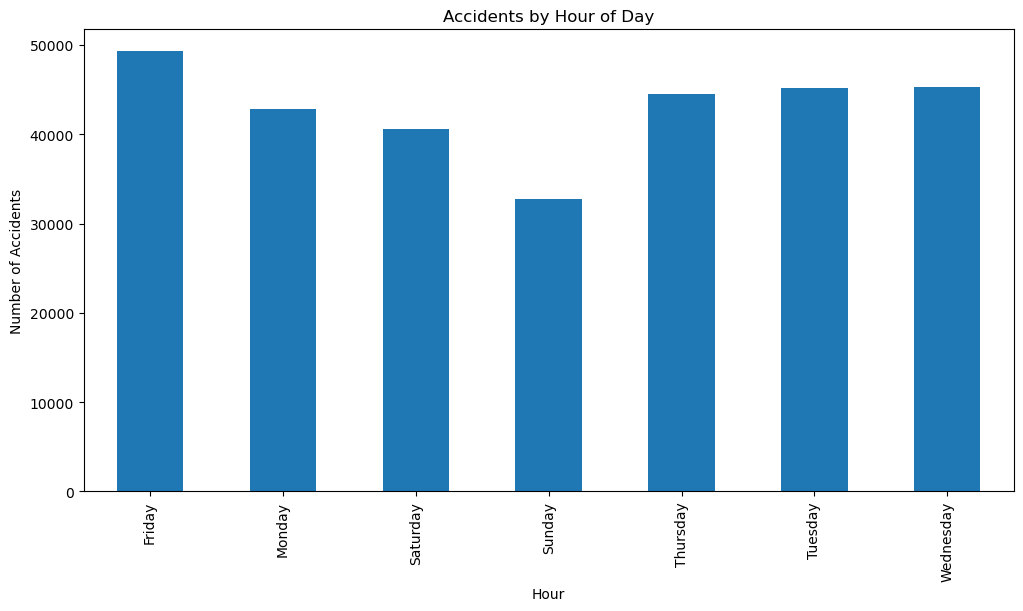

In [87]:
accidents_by_week = df.groupby('Day_of_Week').size()

plt.figure(figsize=(12, 6))
accidents_by_week.plot(kind='bar')
plt.title('Accidents by Week Days')
plt.xlabel('Weekdays')
plt.ylabel('Number of Accidents')
plt.show()

# Accidents Per Speed zone

In [92]:
accidents_by_speed_limit = df.groupby('Speed_limit').size()


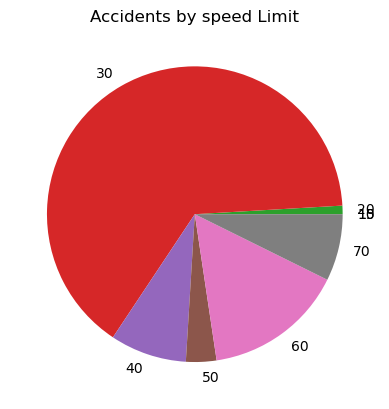

In [104]:
accidents_by_speed_limit.plot(kind='pie')
plt.title('Accidents by speed Limit')
plt.show()